# Breakout 🎮🕹️


## Packages

In [1]:
#!pip install gym[atari]

In [2]:
import random
import gym
import numpy as np
import matplotlib.pyplot as plt 
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
import os
cwd = os.getcwd()
#os.chdir(r'C:\Users\Quentin\Documents\5 GMM Projet\save')  # to change the current directory
os.chdir("/home/villegas/Documents/projet_5gmm/Atari/save")

## Class Agent

In [3]:
class DQN_Breakout_Agent:
    def __init__(self, action_size):
        self.state_size = (4, 84, 74)
        self.action_size = action_size
        
        self.memory = deque(maxlen=10000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.96
        self.learning_rate = 0.001
        self.model = self._build_model()
        
        self.current_stack = deque(maxlen=4) # preprocessing stack of frames

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(32, input_dim=self.state_size, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse',
                      optimizer=Adam(lr=self.learning_rate))
        return model
    
    # enregistre ce qu'il a fait et stock dans son deque(=liste avec limite)
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size) # Hazard
        # Approximation de la ligne de la Q table avec le réseau de neurone
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  # returns action ()
    
    def learn(self, state, action, reward, next_state, done):
        target = reward
        if not done:
            target = (reward + self.gamma *
                      np.amax(self.model.predict(next_state)[0]))
        target_f = self.model.predict(state)
        target_f[0][action] = target
        self.model.fit(state, target_f, epochs=1, verbose=0)

    # Rejoue et apprend batch_size événement au hazard dans son deque
    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            self.learn(state, action, reward, next_state, done)
            
    def refresh(self):
        if self.epsilon > self.epsilon_min :
            self.epsilon *= self.epsilon_decay
            
    # On initialise en écrasant tout     
    def init_stack(self, frm):
        for i in range(4):
            self.current_stack.append(frm)
     
    # update the 4 current stack frames
    def update_stack(self, frm):
        self.current_stack.append(frm)
    
    # Return an 1x4x84x74 batch
    def get_current_batch(self):
        return np.copy(np.array([self.current_stack]))

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)


## New fonctions

In [43]:
def preprocessing(img):
  """
  Gray-scale, reduce edges and down-sampling img to a 84×74 image
  """
  return np.mean(img, axis=2).astype(np.uint8)[30:-12,6:-6][::2,::2]

## Main

In [8]:
env = gym.make('Breakout-v0')
print("State size : %s\nAction size : %s"%(env.observation_space.shape,env.action_space.n))

agent = DQN_Breakout_Agent(action_size = env.action_space.n)

EPISODES = 10
TIME_LIMIT = 10**8

DISPLAY = True

State size : (210, 160, 3)
Action size : 4


In [0]:
for e in range(EPISODES):
    state = env.reset()
    state = preprocessing(state)
    state = agent.init_batch(state) # Pour avoit un batch initiale 1x4x84x74
    
    #score = []
    for time in range(TIME_LIMIT):
        #env.render()        
        action = agent.act(state)
        raw_next_state, reward, done, info = env.step(action) # take a action
        
        # Dès qu'on perd une vie sur les 5, on considère qu'on a perdu
        if info['ale.lives'] < 5 :
            done = True
            
        frame = preprocessing(raw_next_state ) 
        agent.add_frame(frame) # update the 4 current stack frames
        next_state = agent.get_current_batch() # Pour que notre state soit un batch 1x4x84x74
        
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        
        if done and DISPLAY:
            print("episode: {}, score: {:.2}, e: {:.2}"
                  .format(e, 0, agent.epsilon))
            break
        if len(agent.memory) > batch_size: # On se souvient si on a joué au moins batch_size fois.
            agent.replay(batch_size)       # On n'apprend que sur ses souvenirs, pas sur le coup immédiat
    agent.refresh() # update epsillon 
    #if e % 10 == 8:
        #agent.save("lunarlander-dqn.h5")
env.close()

/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


(1, 4)


ReraisedException: ignored

## Tests

In [0]:
obs = env.reset()
obs = np.array(obs)
#env.render()
I = preprocessing(obs)

(84, 74)
(210, 160, 3)


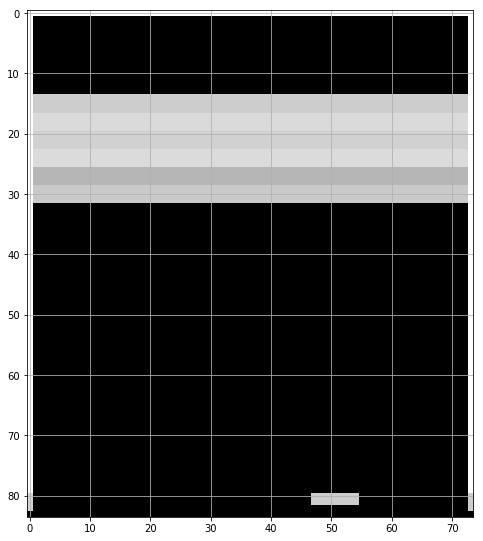

In [44]:
I = obs[::2,::2,:]
I = obs
print(preprocessing(obs).shape)
print(obs.shape)

size = 8
plt.figure(figsize=(size,size*21/16))
#plt.imshow(obs,"gray")
#plt.imshow(obs,"gray")
plt.imshow(preprocessing(obs),"gray")
plt.grid(True)
plt.show()

(2, 4, 84, 74)
<class 'numpy.ndarray'>


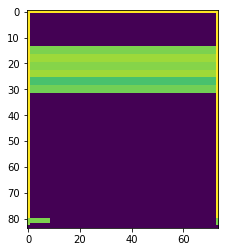

In [45]:
frame = preprocessing(frame)
II = []
I_list = []
I_list.append(frame)
I_list.append(frame)
I_list.append(frame)
I_list.append(frame)
II.append(I_list)
II.append(I_list)

II = np.array(II)

print(II.shape)
print(type(II))
plt.imshow(II[0][0])

In [36]:
obs, reward, done, info = env.step(0)
print(info)
print(info['ale.lives'])


{'ale.lives': 2}
2


In [30]:
def plot_environment(env, figsize=(5,4)):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    f = plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    plt.close(f)
    plt.gcf()

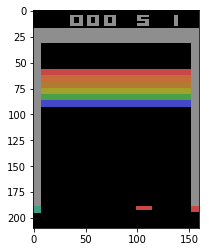

NEW GAME
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 4}
0.0 False {'ale.lives': 4}
0.0 False {'ale.liv

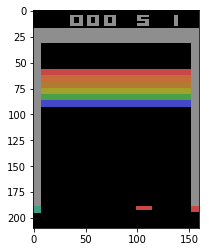

NEW GAME
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 5}
0.0 False {'ale.lives': 4}
0.0 False {'ale.lives': 4}
0.0 False {'ale.lives': 4}
0.0 False {'ale.liv

In [41]:
import time as t
env = gym.make('Breakout-v0')

for _ in range(2):
    obs = env.reset()
    obs = np.array(obs)
    plt.imshow(obs)
    plt.show()
    I_list = []
    print("NEW GAME")
    for time in range(1000):
        #plot_environment(env)
        #t.sleep(0.5)
        frame, reward, done, info = env.step(env.action_space.sample()) # take a random action
        if info['ale.lives'] < 5 :
            done = True
        print(reward, done, info)
        I_list.append(frame)
        if done :
            print("BREAK***********************************")
            break
        """
        print("time: %s"%time)
        plt.figure(figsize=(4,4*21/16))
        plt.imshow(preprocessing(frame),"gray")
        plt.grid(False)
        plt.show()
        """
env.close()